# Import

In [1]:
import scipy
from matplotlib import pyplot as plt
import numpy as np

# Ising Model Class Code

In [2]:
class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300, h=0):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
              
            h (float) The external field applied to the grid
        '''
        self.size = size
        self.temperature = temperature
        self.h = h
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        
        self.temperature = float(temp)
        
    def set_h(self, temp):
        '''
        Set the external magnetic field acting on the model
        '''
        
        self.h = temp

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        
        return ((-self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1) +
            scipy.roll(self.state, -1, axis=0) +
            scipy.roll(self.state, -1, axis=1))).sum()) - 
               self.h * self.state.sum())

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j = scipy.random.randint(self.size, size=2)

        # Change in energy from current state to next state
        # Calculates the energy for this single cell
        delta_E = ((2 * self.J * self.state[i,j] * (
            self.state[(i + 1) % self.size, j] +
            self.state[(i - 1) % self.size, j] +
            self.state[i, (j + 1) % self.size] +
            self.state[i, (j - 1) % self.size]))
                   + 2 * self.h * self.state[i,j])

        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        
        #Determines if the state should be flipped
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]

        self.step += 1

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))


# Example Simulation

C:\Users\Cameron\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


0.15625


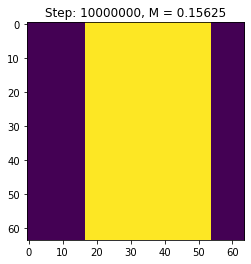

In [3]:
size = 64
sim = IsingSimulation(size, temperature=10)
steps = []
mags = []

for _ in range(10000000):
    sim.update()
    if _ % 100 == 0:
        steps.append(_)
        mags.append(sim.average_magnetism())
sim.display()
plt.figure

print(sim.average_magnetism())

Text(0, 0.5, 'Average magnetisation')

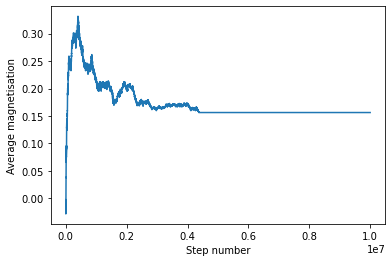

In [4]:
plt.plot(steps, mags)
plt.xlabel("Step number")
plt.ylabel("Average magnetisation")

# Test Scenario at Different Temperatures

In [5]:
# Estimating the critical temperature

#Defined quantities
size = 32
h = 0

#Storage variables
steps = []
mags = []

#Temperature to be changed
temp = [10, 100, 500, 1000, 1500]

for i in range(5):
    sim = IsingSimulation(size, temperature=temp[i])
    steps.append([])
    mags.append([])

    for _ in range(1000000):
        sim.update()
        if _ % 100 == 0:
            steps[i].append(_)
            mags[i].append(sim.average_magnetism())

C:\Users\Cameron\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


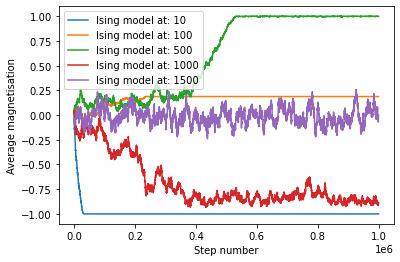

In [6]:
#Plot results

for i in range(5):
    plt.plot(steps[i], mags[i], label=f"Ising model at: {temp[i]}")
plt.xlabel("Step number")
plt.ylabel("Average magnetisation")
plt.legend()
plt.show()

# 3D Ising Model - Layer Visualisation

In [7]:
class IsingSimulation3D:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300, h=0):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
              
            h (float) The external field applied to the grid
        '''
        self.size = size
        self.temperature = temperature
        self.h = h
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        
        self.temperature = float(temp)
        
    def set_h(self, temp):
        '''
        Set the external magnetic field acting on the model
        '''
        
        self.h = temp

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        
        return ((-self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1) +
            scipy.roll(self.state, -1, axis=0) +
            scipy.roll(self.state, -1, axis=1) + 
            scipy.roll(self.state, 1, axis=2) +
            scipy.roll(self.state, -1, axis=2))).sum()) - 
               self.h * self.state.sum())

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j, k = scipy.random.randint(self.size, size=3)

        # Change in energy from current state to next state
        # Calculates the energy for this single cell
        delta_E = ((2 * self.J * self.state[i,j,k] * (
            self.state[(i + 1) % self.size, j, k] +
            self.state[(i - 1) % self.size, j, k] +
            self.state[i, (j + 1) % self.size, k] +
            self.state[i, (j - 1) % self.size, k] + 
            self.state[i, j, (k + 1) % self.size] +
            self.state[i, j, (k - 1) % self.size]))
                   + 2 * self.h * self.state[i,j,k])    
        
        
        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        
        #Determines if the state should be flipped
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j,k] = -self.state[i,j,k]

        self.step += 1

    def display(self, layer=0):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state[:, :, layer], vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))


C:\Users\Cameron\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


1.0


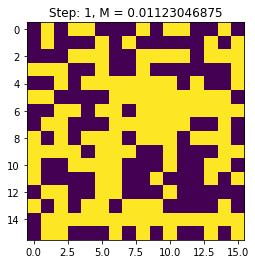

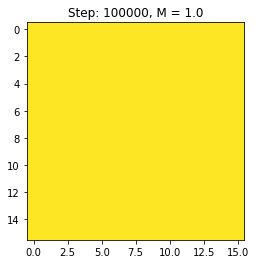

In [8]:
size = 16
t = 900
h = 0.5    

sim = IsingSimulation3D(size, temperature=t, h = h)
layer = size//2
steps = []
mags = []

for _ in range(100000):
    sim.update()
    if _ % 100 == 0:
        steps.append(_)
        mags.append(sim.average_magnetism())
        
        if _ % 100000 == 0:
            sim.display(layer)
            plt.figure
sim.display(layer)
plt.figure

print(sim.average_magnetism())

Text(0, 0.5, 'Average magnetisation')

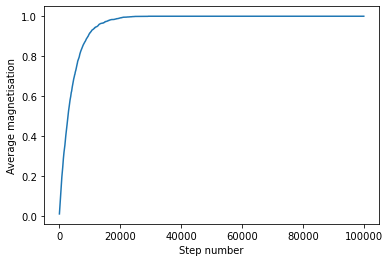

In [9]:
plt.plot(steps, mags)
plt.xlabel("Step number")
plt.ylabel("Average magnetisation")